# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [3]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


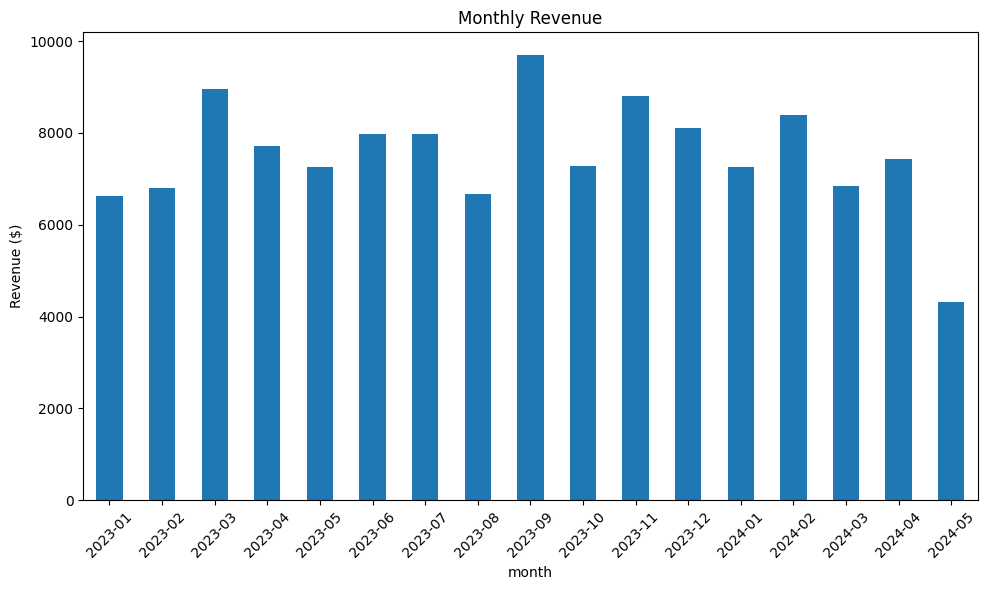

In [4]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [5]:
# Last Quarter inlcudes (January, February, March) in 2024

last_quarter_revenue = monthly_revenue.loc[["2024-01", "2024-02", "2024-03"]].sum()

print(f"Total Revenue Last Quarter: ${last_quarter_revenue}")

Total Revenue Last Quarter: $22493.23


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [6]:
revenue_groupby_customer_id = data.groupby("customer_id")["revenue"].sum()
top_5_customer = revenue_groupby_customer_id.nlargest(5)
print("Top 5 Customers by Revenue:")
print(top_5_customer)

Top 5 Customers by Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [7]:
# Group by customer segment and calculate average revenue
average_custoer_segment_spend = data.groupby("customer_segment")["revenue"].mean()
print("Customer Segment with most average spend per order:")
print(f"{average_custoer_segment_spend.idxmax()} with average spend of ${average_custoer_segment_spend.max():.2f}")

Customer Segment with most average spend per order:
Senior with average spend of $262.13


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [8]:
revenue_groupby_region = data.groupby("region")["revenue"].sum()
revenue_groupby_region

highest_revenue_region = revenue_groupby_region.idxmax()
print(f"Region with highest total revenue: {highest_revenue_region} with revenue of ${revenue_groupby_region.max():.2f}")

order_size_groupby_region = data.groupby("region")["quantity"].mean()
order_size_groupby_region

highest_avg_order_size_region = order_size_groupby_region.idxmax()
print(f"Region with highest average order size: {highest_avg_order_size_region} with average order size of {order_size_groupby_region.max():.2f} items")

Region with highest total revenue: South with revenue of $34839.45
Region with highest average order size: West with average order size of 2.63 items


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [9]:
quantity_groupby_product_category = data.groupby("product_category")["quantity"].sum()
quantity_groupby_product_category.head()

most_popular_product_category_by_quantity = quantity_groupby_product_category.idxmax()
print(f"Top Popular Product by Quantity: {most_popular_product_category_by_quantity} with quantity of {quantity_groupby_product_category.max()}")

revenue_groupby_product_category = data.groupby("product_category")["revenue"].sum()
most_popular_product_category_by_revenue = revenue_groupby_product_category.idxmax()
print(f"Top Popular Product by Revenue: {most_popular_product_category_by_revenue} with revenue of ${revenue_groupby_product_category.max()}")


Top Popular Product by Quantity: Home with quantity of 269
Top Popular Product by Revenue: Home with revenue of $29871.47


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [10]:
# Goal calculate average revenue per order
df_discounted_order = data[data["discount_applied"] > 0]
df_no_discounted_order = data[data["discount_applied"] <= 0]

df_discounted_order.head()

discounted_order_revenue_per_order = df_discounted_order["revenue"].mean()
print(f"Average Revenue per order of discounted: {discounted_order_revenue_per_order:.2f}")

no_discounted_order_revenue_per_order = df_no_discounted_order["revenue"].mean()
print(f"Average Revenue per order of non-discounted: {no_discounted_order_revenue_per_order:.2f}")

print("Yes, discounted orders generate higher revenue per order compared to non-discounted orders")


Average Revenue per order of discounted: 263.83
Average Revenue per order of non-discounted: 248.30
Yes, discounted orders generate higher revenue per order compared to non-discounted orders


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [26]:
total_num_order = data.shape[0]

print(data["payment_method"].unique())

num_of_payment = data["payment_method"].value_counts()

payment_percentage = (num_of_payment / total_num_order) * 100

print(payment_percentage)

['Debit Card' 'Gift Card' 'Credit Card' 'PayPal']
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64


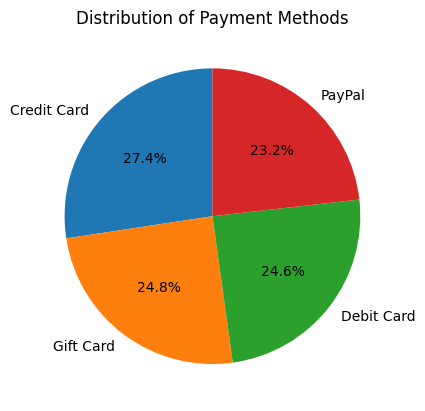

In [27]:
plt.pie(
    payment_percentage,
    labels=payment_percentage.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Payment Methods")
plt.show()

In [34]:
# Evaluate Revenue Based on Payment Method

revenue_groupby_payment = data.groupby("payment_method")["revenue"].sum()

print(f"Payment Method w/ Highest Rev: {revenue_groupby_payment.idxmax()}")
print(f"Highest Payment Method: {payment_percentage.idxmax()}")
print("Yes, it looks likes higher payment method correlates with higher spending!")

Payment Method w/ Highest Rev: Credit Card
Highest Payment Method: Credit Card
Yes, it looks likes higher payment method correlates with higher spending!


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Answer: Don't look at the x-axis but blue represents weekdays and orange represents weekend. It doesn't show enough information that weekends are busier than weekdays.

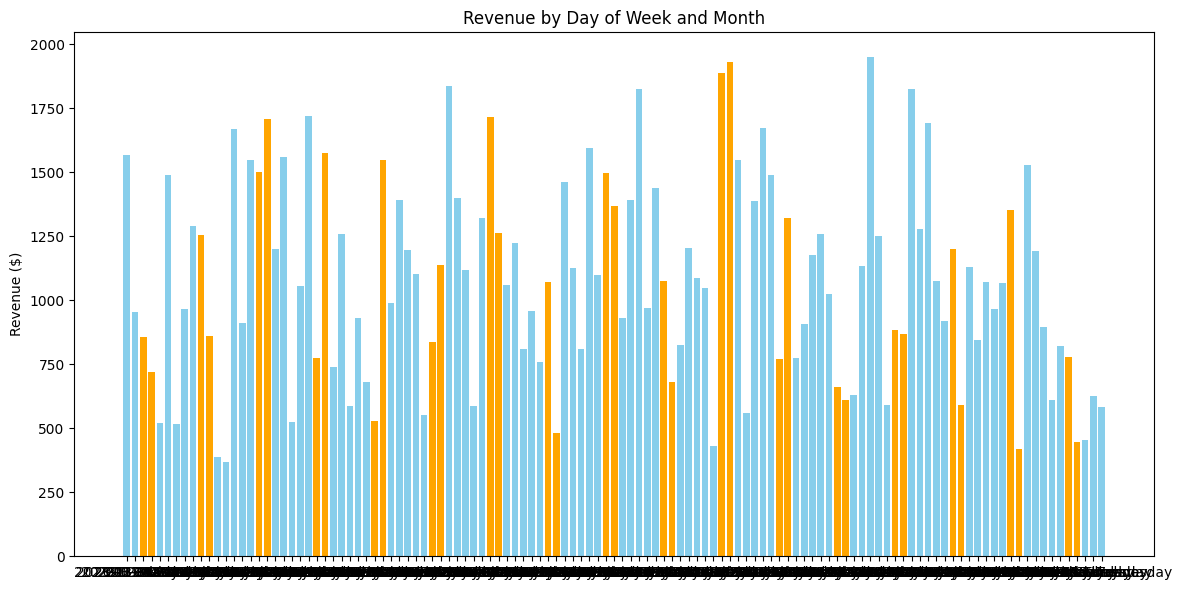

In [61]:
# Should Have:
#   1. Show revenue for each day in order from least to most recent
#   2. Color weekend and weekday different color for easy analysis.

# Revenue by Day of Week
daily_revenue = data.groupby(["month", "day_of_week"])["revenue"].sum().reset_index()

weekends = ["Saturday", "Sunday"]
colors = daily_revenue["day_of_week"].apply(lambda x: "orange" if x in weekends else "skyblue")

daily_revenue["label"] = daily_revenue["month"].astype(str) + "-" + daily_revenue["day_of_week"].astype(str)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(daily_revenue["label"], daily_revenue["revenue"], color=colors)
plt.title("Revenue by Day of Week and Month")
plt.ylabel("Revenue ($)")

plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [72]:
data["profit"] = data["revenue"] * 0.20

estimate_total_profit = data["profit"].sum()

profit_by_region = data.groupby("region")["profit"].sum()

print(f"Estimate Total Profit: ${estimate_total_profit}")
print(f"Most Profitable Region: {profit_by_region.idxmax()}")

Estimate Total Profit: $25628.134
Most Profitable Region: South


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

From my analysis, I would recommend these following discovered from the data:
1. Offer more Home products as they are very popular seen from the quantity sold and revenue earned.
2. Discounted orders tend to have higher revenue so increase discount.



---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.